In [ ]:
import pandas as pd

# Load the CSV file
input_file = 'walmart-retail-dataset-QueryResult (1).csv'
output_file = 'cleaned_dataset.csv'

# Read the file
data = pd.read_csv(input_file)

# Function to remove non-ASCII characters from a string
def remove_non_ascii(s):
    if isinstance(s, str):
        return ''.join(c for c in s if ord(c) < 128)
    return s

# Apply the function to all string entries in the DataFrame
cleaned_data = data.applymap(remove_non_ascii)

# Save the cleaned DataFrame to a new CSV file
cleaned_data.to_csv(output_file, index=False)

print(f"Non-ASCII characters removed. Cleaned file saved to {output_file}.")


<ipython-input-7-0e99088b70ff>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_data = data.applymap(remove_non_ascii)


Non-ASCII characters removed. Cleaned file saved to cleaned_dataset.csv.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart-retail-dataset-QueryResult (1).csv to walmart-retail-dataset-QueryResult (1).csv


In [ ]:
data = pd.read_csv('walmart-retail-dataset-QueryResult (1).csv')

In [ ]:
data.shape

(8399, 24)

In [ ]:
data.head()

,city,customer_name,customer_segment,discount,number_of_records,order_date,order_id,order_priority,order_quantity,product_base_margin,...,profit,region,row_id,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,McKeesport,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,0.68,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,NaN,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,0.56,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,0.39,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,0.69,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [ ]:
data.tail()

,city,customer_name,customer_segment,discount,number_of_records,order_date,order_id,order_priority,order_quantity,product_base_margin,...,profit,region,row_id,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
8394,Fairfield,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,0.59,...,-15.07,West,7142,448.10,2015-12-30,Express Air,4.51,California,13.48,94533
8395,Harker Heights,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,0.39,...,-18.66,Central,3583,257.46,2015-12-30,Express Air,4.23,Texas,7.28,76543
8396,Riverview,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,0.37,...,-1.29,South,6361,14.15,2015-12-30,Regular Air,0.70,Florida,1.48,33569
8397,Nicholasville,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,0.83,...,-745.20,South,6916,803.33,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356
8398,Nicholasville,Maribeth Yedwab,Home Office,0.00,1,2015-12-30,49344,Low,31,0.68,...,27.85,South,6915,672.93,2015-12-30,Regular Air,4.00,Kentucky,19.98,40356


In [ ]:
len(pd.unique(data['order_id']))

5496

In [ ]:
len(data['order_id'])

8399

In [ ]:
len(pd.unique(data['row_id']))

8399

In [ ]:
len(data['row_id'])

8399

In [ ]:
data.isnull().sum()

,0
city,0
customer_name,0
customer_segment,0
discount,0
number_of_records,0
order_date,0
order_id,0
order_priority,0
order_quantity,0
product_base_margin,63


In [ ]:
data.describe()

,discount,number_of_records,order_id,order_quantity,product_base_margin,profit,row_id,sales,shipping_cost,unit_price,zip_code
count,8399.000000,8399.0,8399.000000,8399.000000,8336.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,0.049671,1.0,29965.179783,25.571735,0.512513,181.184422,4200.000000,1775.878179,12.838557,89.346259,52839.139421
std,0.031823,0.0,17260.883447,14.481071,0.135589,1196.653326,2424.726789,3585.050525,17.264052,290.354383,28509.535635
min,0.000000,1.0,3.000000,1.000000,0.350000,-14140.701600,1.000000,2.240000,0.490000,0.990000,1001.000000
25%,0.020000,1.0,15011.500000,13.000000,0.380000,-83.315000,2100.500000,143.195000,3.300000,6.480000,30337.000000
50%,0.050000,1.0,29857.000000,26.000000,0.520000,-1.500000,4200.000000,449.420000,6.070000,20.990000,52732.000000
75%,0.080000,1.0,44596.000000,38.000000,0.590000,162.748000,6299.500000,1709.320000,13.990000,85.990000,77577.000000
max,0.250000,1.0,59973.000000,50.000000,0.850000,27220.690000,8399.000000,89061.050000,164.730000,6783.020000,99362.000000


**Unique customer ID**

I created a unique customer id for each customer based on zip code and customer name so that thetwo same name person can have different ids to make analysis easy

In [ ]:
data['zip_code'] = data['zip_code'].apply(str)

In [ ]:
data['zip_code'].dtype

dtype('O')

In [ ]:
unique = data[['zip_code', 'customer_name',]].agg(' '.join, 1).unique().tolist()

In [ ]:
ids = np.random.randint(low=1e9, high=1e10, size = len(unique))

In [ ]:
maps = {k:v for k,v in zip(unique, ids)}

In [ ]:
data['id'] = data[['zip_code', 'customer_name']].agg(' '.join, 1).map(maps)

# CHECKING TIME PERIOD

In [ ]:
print('Min date: %s\nMax date: %s' % (data['ship_date'].min(), data['ship_date'].max()))

Min date: 2012-01-02
Max date: 2015-12-30


In [ ]:

print('Min date: %s\nMax date: %s' % (data['order_date'].min(), data['order_date'].max()))

Min date: 2012-01-01
Max date: 2015-12-30


In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [ ]:
data['ship_date'] = pd.to_datetime(data['ship_date'])

In [ ]:
print('Min date: %s\nMax date: %s' % (data['order_date'].min(), data['order_date'].max()))

Min date: 2012-01-01 00:00:00
Max date: 2015-12-30 00:00:00


GROUPING DATA BY YEAR

In [ ]:
data.set_index('order_date')['id'].resample('Y').nunique()

order_date
2012-12-31    1193
2013-12-31    1218
2014-12-31    1155
2015-12-31    1205
Freq: A-DEC, Name: id, dtype: int64

In [ ]:
data2= data.set_index('order_date')['id'].resample('Y').nunique()

<ipython-input-25-903175178821>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data2= data.set_index('order_date')['id'].resample('Y').nunique()


In [ ]:
data2

,id
order_date,
2012-12-31,1193
2013-12-31,1218
2014-12-31,1155
2015-12-31,1205


In [ ]:
data.head()

,city,customer_name,customer_segment,discount,number_of_records,order_date,order_id,order_priority,order_quantity,product_base_margin,...,region,row_id,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code,id
0,McKeesport,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,0.68,...,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131,2837245271
1,Bowie,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,NaN,...,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715,8229026532
2,Napa,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,0.56,...,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559,7642194997
3,Montebello,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,0.39,...,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640,6240261047
4,Napa,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,0.69,...,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559,7642194997


# **RFM**

## ***SALES***

In [ ]:
df1=data.astype({"order_quantity": float})


df1.head()

,city,customer_name,customer_segment,discount,number_of_records,order_date,order_id,order_priority,order_quantity,product_base_margin,...,region,row_id,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code,id
0,McKeesport,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32.0,0.68,...,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131,2837245271
1,Bowie,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9.0,NaN,...,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715,8229026532
2,Napa,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4.0,0.56,...,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559,7642194997
3,Montebello,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43.0,0.39,...,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640,6240261047
4,Napa,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43.0,0.69,...,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559,7642194997


In [ ]:
m_revenue_df = df1.set_index('order_date')['sales'].round(2).resample('Y').sum() # using round function to get 2 values after decimal point
m_revenue_df

<ipython-input-30-1eeeff05e577>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  m_revenue_df = df1.set_index('order_date')['sales'].round(2).resample('Y').sum() # using round function to get 2 values after decimal point


,sales
order_date,
2012-12-31,4209139.45
2013-12-31,3549680.84
2014-12-31,3436816.77
2015-12-31,3719963.86


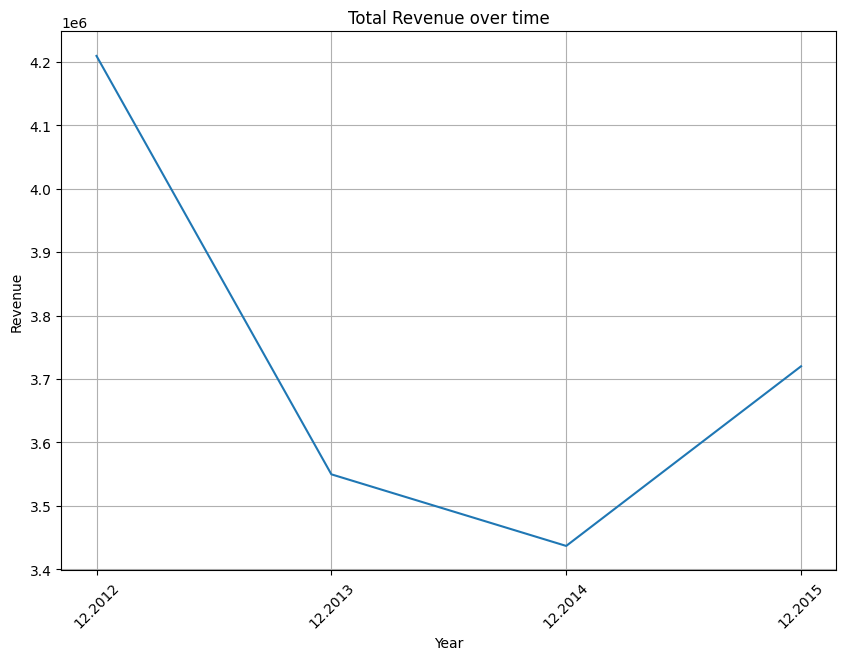

In [ ]:
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Year')
ax.set_ylabel('Revenue')
ax.set_title('Total Revenue over time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_revenue_df.index)),
    [x.strftime('%m.%Y') for x in m_revenue_df.index],
    rotation=45
)

plt.show()

According to the above graph, sales decreased steadily from 2012 to 2014 before abruptly increasing in 2015.

In [ ]:
invoice_df = df1.groupby(
    by=['order_date']
).agg({
    'sales': sum,
    'id': max,
    'state': max,
}).reset_index()

<ipython-input-32-e057acdce435>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg({
<ipython-input-32-e057acdce435>:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg({


In [ ]:
invoice_df.head()

,order_date,sales,id,state
0,2012-01-01,1052.8400,8229026532,Pennsylvania
1,2012-01-02,11101.8700,7642194997,Minnesota
2,2012-01-03,31997.8555,7504197196,Utah
3,2012-01-04,1254.2500,4213974063,Texas
4,2012-01-05,39734.4040,8727969748,Texas


In [ ]:
invoice_df.max()

,0
order_date,2015-12-30 00:00:00
sales,117076.414
id,9998793122
state,Wyoming


**Repeated customer**

In [ ]:
m_repeat_customers_df = invoice_df.set_index('order_date').groupby([
    pd.Grouper(freq='YE'), 'id'
]).filter(lambda x: len(x) > 1).resample('YE').nunique()['id']

In [ ]:
m_repeat_customers_df

,id
order_date,
2012-12-31,38
2013-12-31,48
2014-12-31,35
2015-12-31,45


**Unique customers**

In [ ]:
m_unique_customers_df = df1.set_index('order_date')['id'].resample('YE').nunique()

In [ ]:
m_unique_customers_df

,id
order_date,
2012-12-31,1193
2013-12-31,1218
2014-12-31,1155
2015-12-31,1205


In [ ]:
m_repeat_percentage = (m_repeat_customers_df/m_unique_customers_df)*100
m_repeat_percentage

,id
order_date,
2012-12-31,3.185247
2013-12-31,3.940887
2014-12-31,3.030303
2015-12-31,3.734440


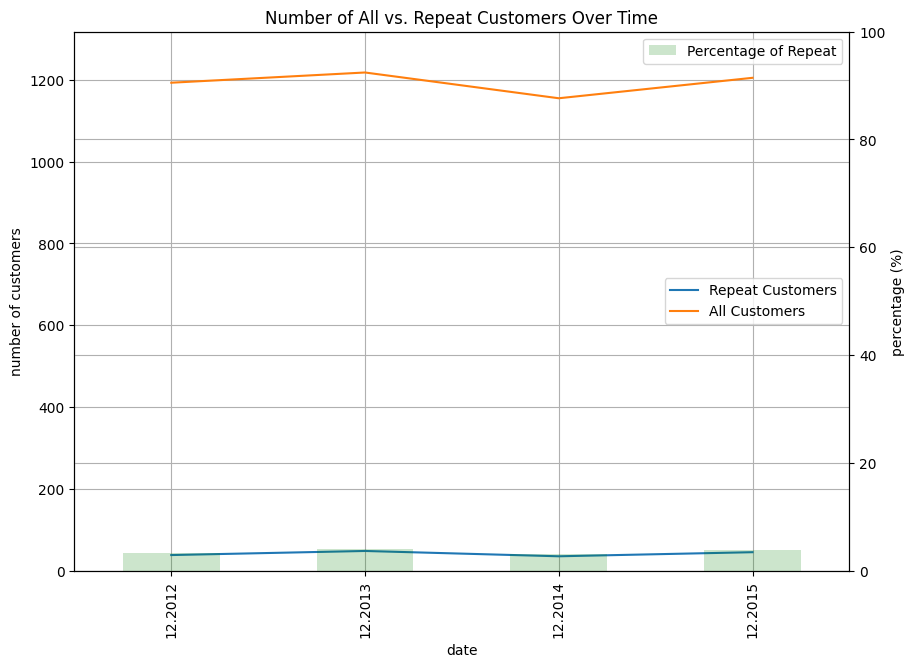

In [ ]:
plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index],
    rotation=45
)
plt.show()

**Recency**

In [ ]:
data['order_date'] = pd.DatetimeIndex(data['order_date']).date

In [ ]:
recency_df = data.groupby(by='id', as_index=False)['order_date'].max()
recency_df.columns = ['id','LastPurchaseDate']
recency_df

,id,LastPurchaseDate
0,1001878376,2013-12-07
1,1008546627,2015-10-25
2,1011294124,2015-09-13
3,1016037031,2015-11-10
4,1028355213,2012-09-18
...,...,...
2601,9970803885,2015-11-28
2602,9975697740,2013-09-03
2603,9979891851,2014-07-10
2604,9996297186,2014-11-08


In [ ]:
import datetime as dt

In [ ]:
recency_df['LastPurchaseDate']

,LastPurchaseDate
0,2013-12-07
1,2015-10-25
2,2015-09-13
3,2015-11-10
4,2012-09-18
...,...
2601,2015-11-28
2602,2013-09-03
2603,2014-07-10
2604,2014-11-08


In [ ]:
last = dt.date(2015,12,31)
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x))
recency_df['Recency'] = recency_df['Recency']+pd.Timedelta('1D')
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)
recency_df

,id,Recency
0,1001878376,755 days
1,1008546627,68 days
2,1011294124,110 days
3,1016037031,52 days
4,1028355213,1200 days
...,...,...
2601,9970803885,34 days
2602,9975697740,850 days
2603,9979891851,540 days
2604,9996297186,419 days


In [ ]:
recency_df['Recency'] = recency_df['Recency'].astype(str).str.replace('days', '') #removing days from recency column to get number only

In [ ]:
recency_df

,id,Recency
0,1001878376,755
1,1008546627,68
2,1011294124,110
3,1016037031,52
4,1028355213,1200
...,...,...
2601,9970803885,34
2602,9975697740,850
2603,9979891851,540
2604,9996297186,419


In [ ]:
recency_df['Recency'] = recency_df['Recency'].astype(int) #changing recency column to integer

**Frequency**

In [ ]:
frequency_df = data.drop_duplicates(subset=['order_id', 'id'], keep="first")
frequency_df = frequency_df.groupby(by=['id'], as_index=False)['order_id'].count()
frequency_df.columns = ['id','Frequency']
frequency_df

,id,Frequency
0,1001878376,1
1,1008546627,6
2,1011294124,3
3,1016037031,1
4,1028355213,2
...,...,...
2601,9970803885,5
2602,9975697740,1
2603,9979891851,4
2604,9996297186,2


In [ ]:
frequency_df.dtypes

,0
id,int64
Frequency,int64


**Monetary**

In [ ]:
monetary_df = data.groupby(by='id',as_index=False).agg({'sales': 'sum'})
monetary_df.columns = ['id','Monetary']
monetary_df

,id,Monetary
0,1001878376,78.4700
1,1008546627,7704.9800
2,1011294124,1927.8400
3,1016037031,2654.1600
4,1028355213,11885.8500
...,...,...
2601,9970803885,18593.8075
2602,9975697740,66.4100
2603,9979891851,6532.9665
2604,9996297186,3497.4655


**Creating RFM data**

In [ ]:
temp_df = recency_df.merge(frequency_df,on='id')
temp_df.set_index('id',inplace=True)
temp_df

,Recency,Frequency
id,,
1001878376,755,1
1008546627,68,6
1011294124,110,3
1016037031,52,1
1028355213,1200,2
...,...,...
9970803885,34,5
9975697740,850,1
9979891851,540,4


In [ ]:
rfm_df = temp_df.merge(monetary_df,on='id')

rfm_df.set_index('id',inplace=True)

rfm_df.head()
rfm_df.to_csv('rfm_df.csv') #saving rfm data to csv for further analysis

In [ ]:
rfm_df

,Recency,Frequency,Monetary
id,,,
1001878376,755,1,78.4700
1008546627,68,6,7704.9800
1011294124,110,3,1927.8400
1016037031,52,1,2654.1600
1028355213,1200,2,11885.8500
...,...,...,...
9970803885,34,5,18593.8075
9975697740,850,1,66.4100
9979891851,540,4,6532.9665


In [ ]:
quintiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles #creating quintiles to do RFM analysis

{'Recency': {0.2: 134.0, 0.4: 304.0, 0.6: 536.0, 0.8: 886.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 3.0, 0.8: 4.0},
 'Monetary': {0.2: 430.41,
  0.4: 1731.104,
  0.6: 4453.61,
  0.8: 9481.265500000001}}

In [ ]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [ ]:
rfm_df['R'] = rfm_df['Recency'].apply(lambda x: r_score(x))
rfm_df['F'] =rfm_df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm_df['M'] = rfm_df['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [ ]:
rfm_df['RFM_Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
id,,,,,,,
1001878376,755,1,78.47,2,1,1,211
1008546627,68,6,7704.98,5,5,4,554
1011294124,110,3,1927.84,5,3,3,533
1016037031,52,1,2654.16,5,1,3,513
1028355213,1200,2,11885.85,1,3,5,135


In [ ]:
segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'

}

rfm_df['Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segments, regex=True)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
id,,,,,,,,
1001878376,755,1,78.47,2,1,1,211,at risk
1008546627,68,6,7704.98,5,5,4,554,champions
1011294124,110,3,1927.84,5,3,3,533,champions
1016037031,52,1,2654.16,5,1,3,513,new customers
1028355213,1200,2,11885.85,1,3,5,135,at risk


In [ ]:
# count the number of customers in each segment
segments_counts = rfm_df['Segment'].value_counts().sort_values(ascending=True)
segments_counts

,count
Segment,
can't loose,33
new customers,206
loyal customers,329
needs attention,397
champions,634
at risk,1007


In [ ]:
rfm_df['RFM_Score'].astype('int')

,RFM_Score
id,
1001878376,211
1008546627,554
1011294124,533
1016037031,513
1028355213,135
...,...
9970803885,555
9975697740,211
9979891851,244


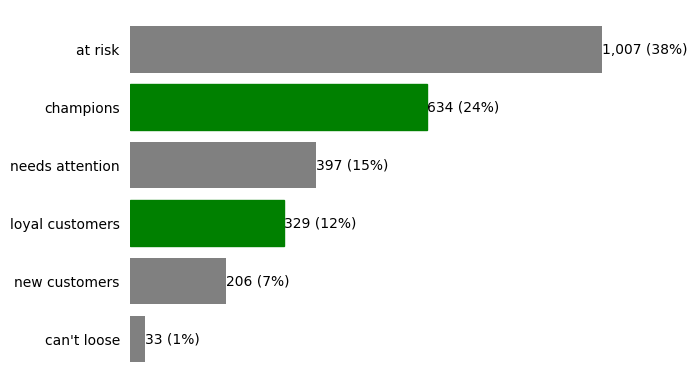

In [ ]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

According to the above graph, the majority of customers are vulnerable and require attention, hence Walmart needs to concentrate on them in order to boost sales. In addition, 24% of Walmart consumers are considered champions, which means that they are likely to spend a lot of money there. 12% of Walmart's consumers are devoted, which indicates they frequently make purchases there.

In [ ]:
rfm = pd.read_csv('/content/rfm_df.csv', index_col ='id')

In [ ]:
rfm

,Recency,Frequency,Monetary
id,,,
1001878376,755,1,78.4700
1008546627,68,6,7704.9800
1011294124,110,3,1927.8400
1016037031,52,1,2654.1600
1028355213,1200,2,11885.8500
...,...,...,...
9970803885,34,5,18593.8075
9975697740,850,1,66.4100
9979891851,540,4,6532.9665


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             Recency  Frequency  Monetary
id                                       
1001878376  0.618174   0.932451  0.739498
1008546627  1.119120   2.422004  0.259563
1011294124  1.012910   0.409331  0.497233
1016037031  1.159581   0.932451  0.402087
1028355213  1.743496   0.261560  0.807250
...              ...        ...       ...
9970803885  1.205100   1.751113  1.685981
9975697740  0.858412   0.932451  0.741078
9979891851  0.074480   1.080222  0.106031
9996297186  0.231507   0.261560  0.291615
9998793122  0.286900   0.409331  0.691494

[2606 rows x 3 columns]


In [ ]:
rfm_clean = rfm[(z < 3).all(axis=1)]

In [ ]:
rfm.shape

(2606, 3)

In [ ]:
rfm_clean.shape

(2532, 3)

<Axes: >

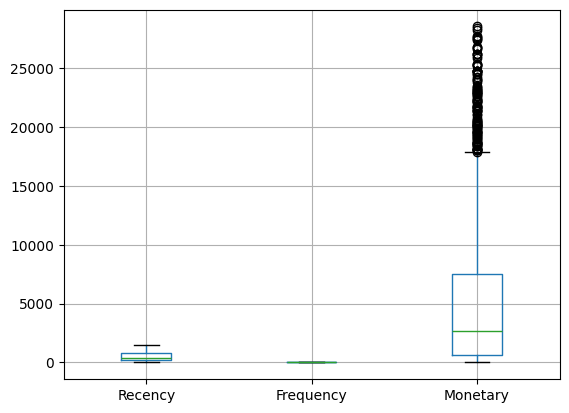

In [ ]:
rfm_clean.boxplot()

In [ ]:
import seaborn as sns

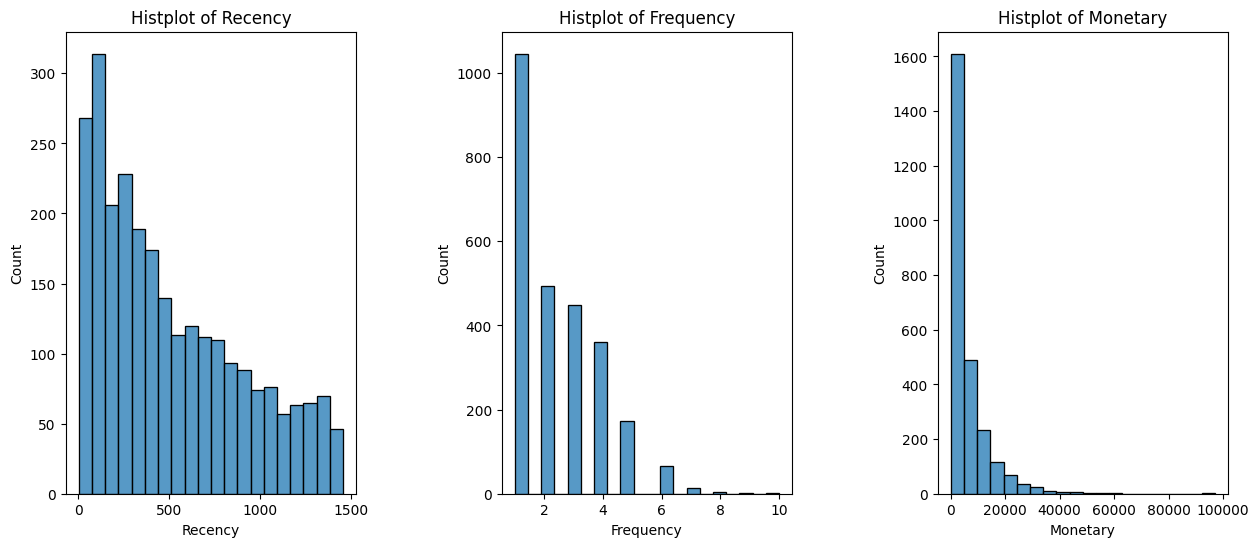

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Recency' , 'Frequency' , 'Monetary']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(rfm[x] , bins = 20)
    plt.title('Histplot of {}'.format(x))
plt.show()

In [ ]:
x = rfm

In [ ]:
x.head()

,Recency,Frequency,Monetary
id,,,
1001878376,755,1,78.47
1008546627,68,6,7704.98
1011294124,110,3,1927.84
1016037031,52,1,2654.16
1028355213,1200,2,11885.85


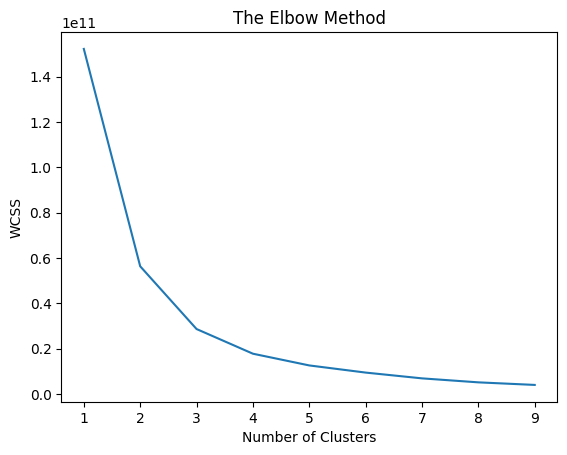

In [ ]:
from sklearn.cluster import KMeans
# Using elbow method to know number of clusters for modelling
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Three clusters**

In [ ]:
kmeans = KMeans(n_clusters = 3) # creating kmeans model for 3 clusters
y_kmeans = kmeans.fit_predict(x)


In [ ]:
rfm['Cluster_ID'] = y_kmeans

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


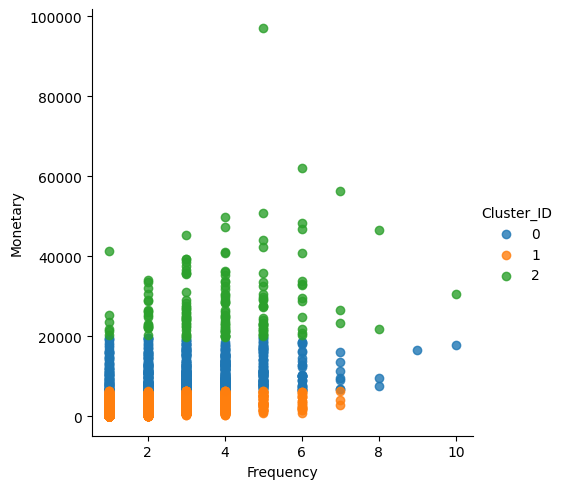

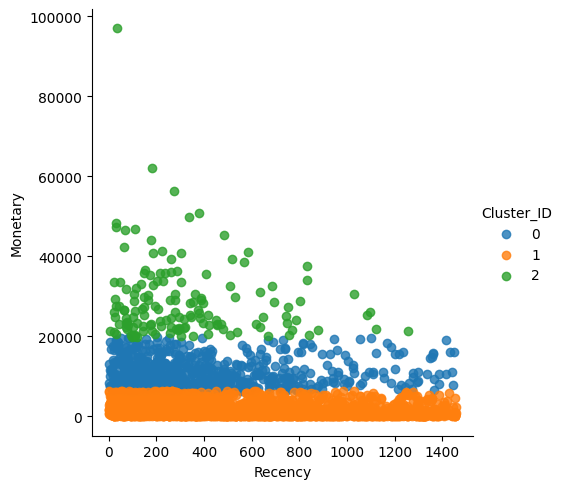

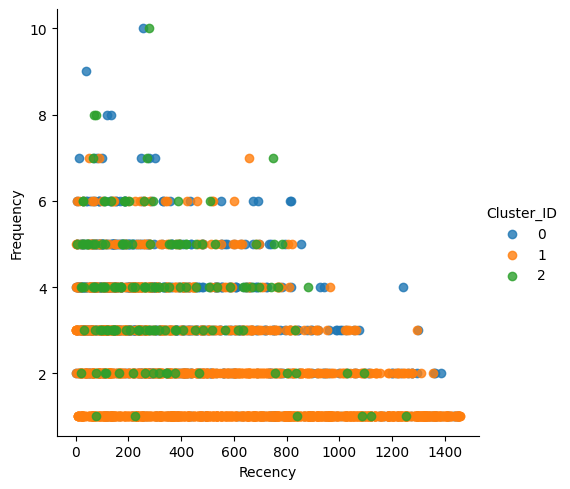

In [ ]:
# Create a plot for frequency vs monetary
facet = sns.lmplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster_ID',
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=rfm, x='Recency', y='Monetary', hue='Cluster_ID',
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet3 = sns.lmplot(data=rfm, x='Recency', y='Frequency', hue='Cluster_ID',
                   fit_reg=False, legend=True, legend_out=True)

We can conclude from the frequency and money plot that individuals with frequencies between 5 and 7 often spend more money. After that, the value of money began to decline.
In terms of money and recent purchases, we can see that clients who did not make a purchase a long time ago spent less money than those who made a purchase recently.
The graph of recency and frequency does not reveal anything about the data.

In [ ]:
for i in range(rfm['Cluster_ID'].nunique()):
    rfm_clean_mean= rfm.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,Recency,Frequency,Monetary
Cluster_ID,,,
0,390.524096,3.317771,10962.821431
1,570.489136,1.919777,1887.310062
2,320.755102,3.938776,28901.808378


**Three clusters on cleaned data**

In [ ]:
x2 =rfm_clean

In [ ]:
kmeans_2 = KMeans(n_clusters = 3) #creating k means using 4 clusters
y_kmeans_2= kmeans_2.fit_predict(x2)

In [ ]:
rfm_clean['Cluster_ID_2'] = y_kmeans_2

<ipython-input-84-bcbf7b7a48b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID_2'] = y_kmeans_2


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


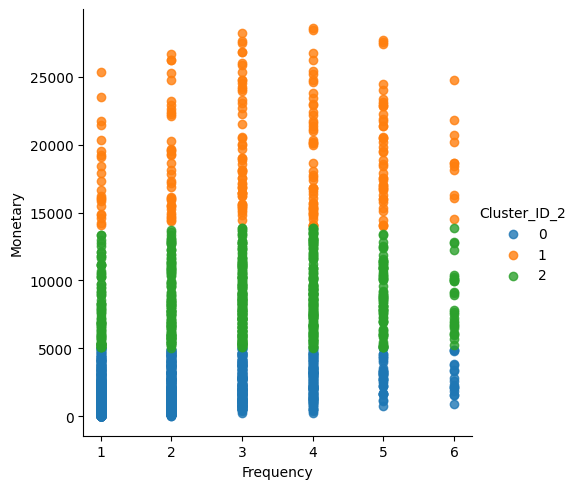

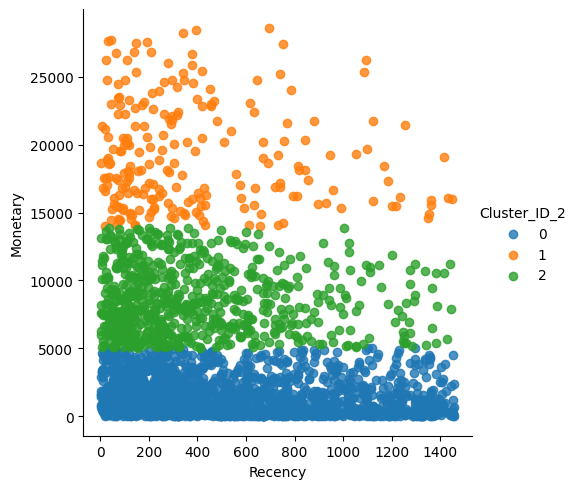

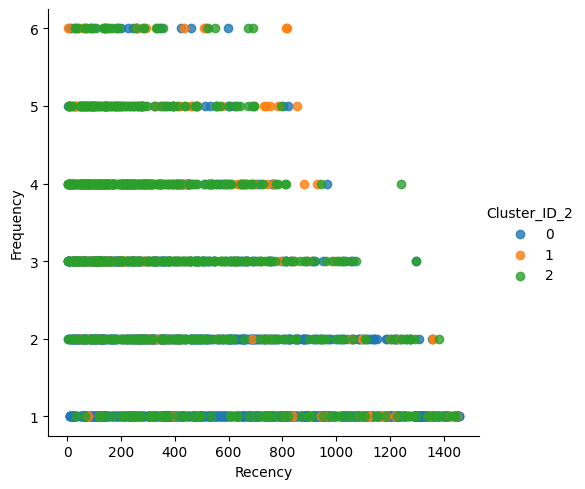

In [ ]:
# Create a plot for frequency vs monetary
facet = sns.lmplot(data=rfm_clean, x='Frequency', y='Monetary', hue='Cluster_ID_2',
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=rfm_clean, x='Recency', y='Monetary', hue='Cluster_ID_2',
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet3 = sns.lmplot(data=rfm_clean, x='Recency', y='Frequency', hue='Cluster_ID_2',
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
for i in range(rfm_clean['Cluster_ID_2'].nunique()):
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID_2']).mean()

rfm_clean_mean

,Recency,Frequency,Monetary
Cluster_ID_2,,,
0,586.810546,1.813611,1508.918741
1,386.802691,3.426009,19203.831469
2,393.718289,3.148968,8578.204149


**Four clusters on cleaned data**

In [ ]:
kmeans_4 = KMeans(n_clusters = 4) #creating k means using 4 clusters
y_kmeans_4= kmeans_4.fit_predict(x2)

In [ ]:
rfm_clean['Cluster_ID_4'] = y_kmeans_4

<ipython-input-302-dfa88bb3a3a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID_4'] = y_kmeans_4


/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


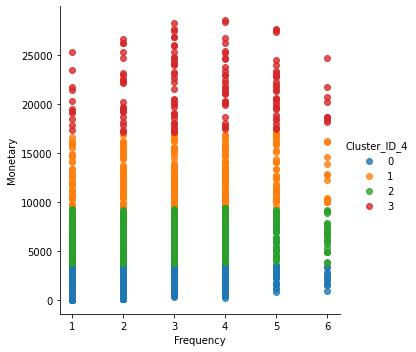

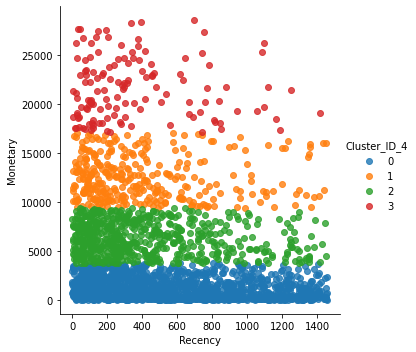

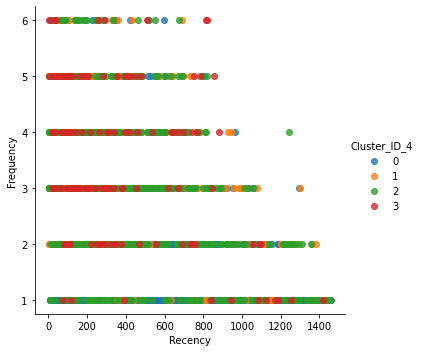

In [ ]:
# Create a plot for frequency vs monetary
facet = sns.lmplot(data=rfm_clean, x='Frequency', y='Monetary', hue='Cluster_ID_4',
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=rfm_clean, x='Recency', y='Monetary', hue='Cluster_ID_4',
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet3 = sns.lmplot(data=rfm_clean, x='Recency', y='Frequency', hue='Cluster_ID_4',
                   fit_reg=False, legend=True, legend_out=True)

From the  above two types pf graphs for 3 clusters and 4 clusters we can easily say thay the 4 clusters are giving us more detailed insights to us above the data distribution based on recency, frequency and monetary of walmart data.rom the frequency and money plot that individuals with frequencies between 3 and 5 often spend more money. After that, the value of money began to decline. In terms of money and recent purchases, we can see that clients who did not make a purchase a long time ago spent less money than those who made a purchase recently. At cluster 4th the monetary decreased with increase in recency  The graph of recency and frequency does not reveal anything about the data.



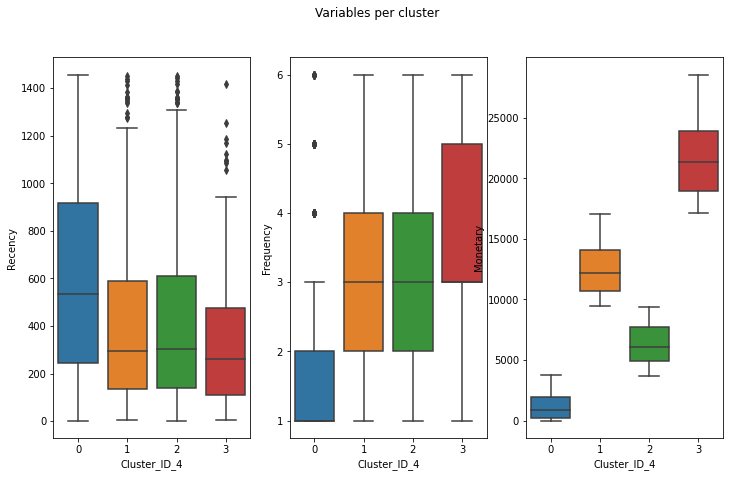

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 7))
sns.boxplot(x=rfm_clean['Cluster_ID_4'], y=rfm_clean['Recency'], ax=axes[0])
sns.boxplot(x=rfm_clean['Cluster_ID_4'], y=rfm_clean['Frequency'], ax=axes[1])
sns.boxplot(x=rfm_clean['Cluster_ID_4'], y=rfm_clean['Monetary'], ax=axes[2])
plt.suptitle('Variables per cluster')
plt.show()

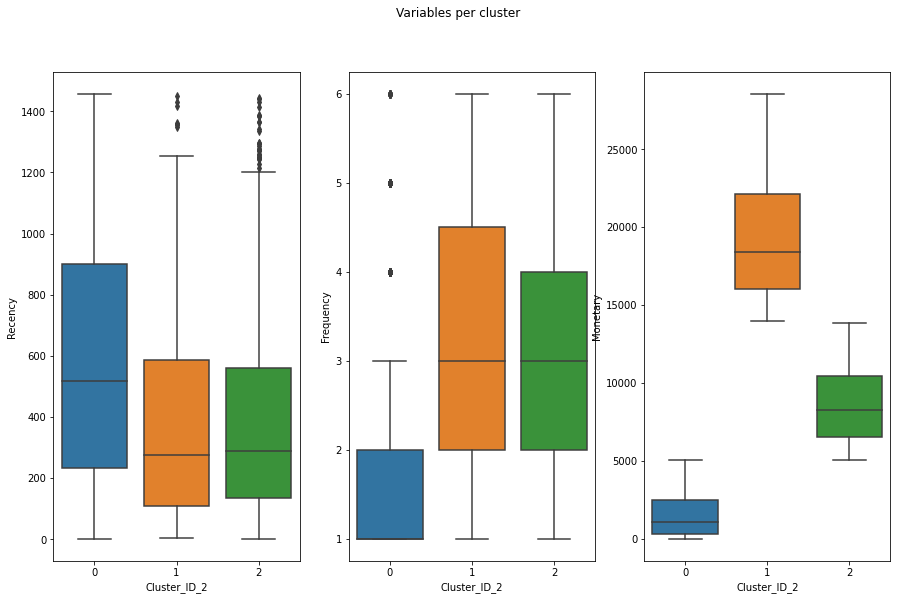

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 9))
sns.boxplot(x=rfm_clean['Cluster_ID_2'], y=rfm['Recency'], ax=axes[0])
sns.boxplot(x=rfm_clean['Cluster_ID_2'], y=rfm['Frequency'], ax=axes[1])
sns.boxplot(x=rfm_clean['Cluster_ID_2'], y=rfm['Monetary'], ax=axes[2])
plt.suptitle('Variables per cluster')
plt.show()

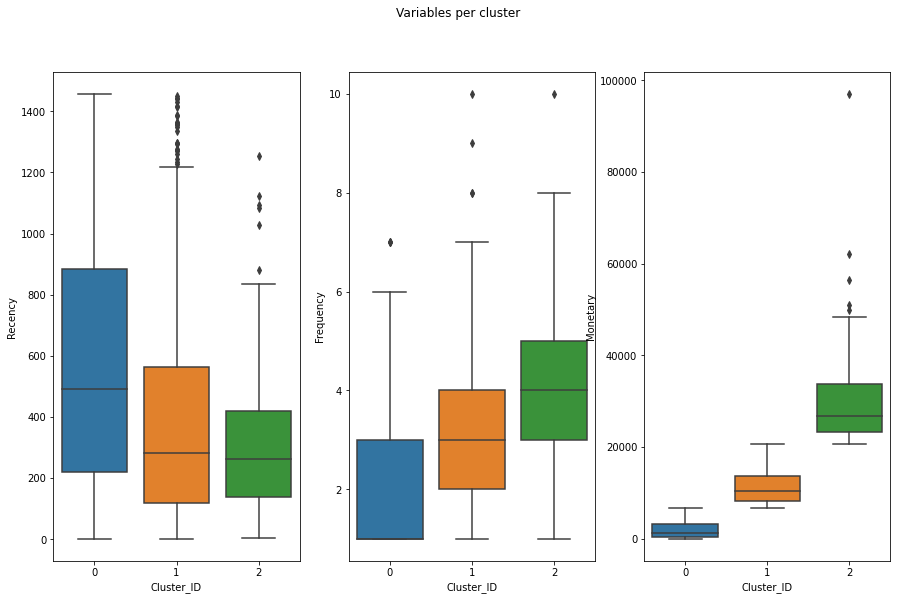

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 9))
sns.boxplot(x=rfm['Cluster_ID'], y=rfm['Recency'], ax=axes[0])
sns.boxplot(x=rfm['Cluster_ID'], y=rfm['Frequency'], ax=axes[1])
sns.boxplot(x=rfm['Cluster_ID'], y=rfm['Monetary'], ax=axes[2])
plt.suptitle('Variables per cluster')
plt.show()

With fewer outliers and lower recency than cluster 1, cluster 2 has the highest financial and frequency values in the first graphs. We can see that the third cluster has the largest frequency and monetary values in plots with three clusters. In my perspective, 3 clusters do not accurately depict the general distribution of division based on the rfm clean dataset because it is visually obvious from the scatter plots and boxplots that certain segments are more indicative of the consumers.

**Marketing recommendations**

1. Company can introduce the personalized email marketing campaigns for the customers who need attention  and are at risk so that customers do not stop shopping.
2. To avoid churning of customers Company can provide offers to customers who purchase same item repeatedly
3. Other way to keep a follow up with new customers and loyal customers, champions with relevant promotions and informative information that will probably boost their interest.
4. Company should focus more on the product category which is sold most and are ordered frequently by adverstising them. Also company should focus on office supplies and technology category to increase their profit.
